In [122]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [166]:
sales_suco = pd.read_csv("../data/sales_suco.csv", index_col='DATE', parse_dates=True)

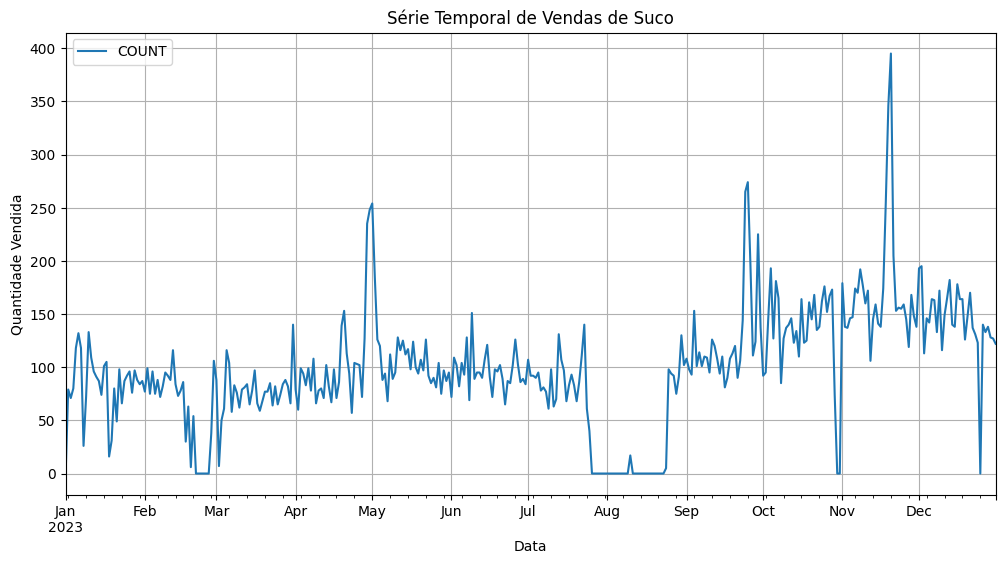

In [167]:
sales_suco.plot(figsize=(12, 6))
plt.title('Série Temporal de Vendas de Suco')
plt.xlabel('Data')
plt.ylabel('Quantidade Vendida')
plt.grid()
plt.show()

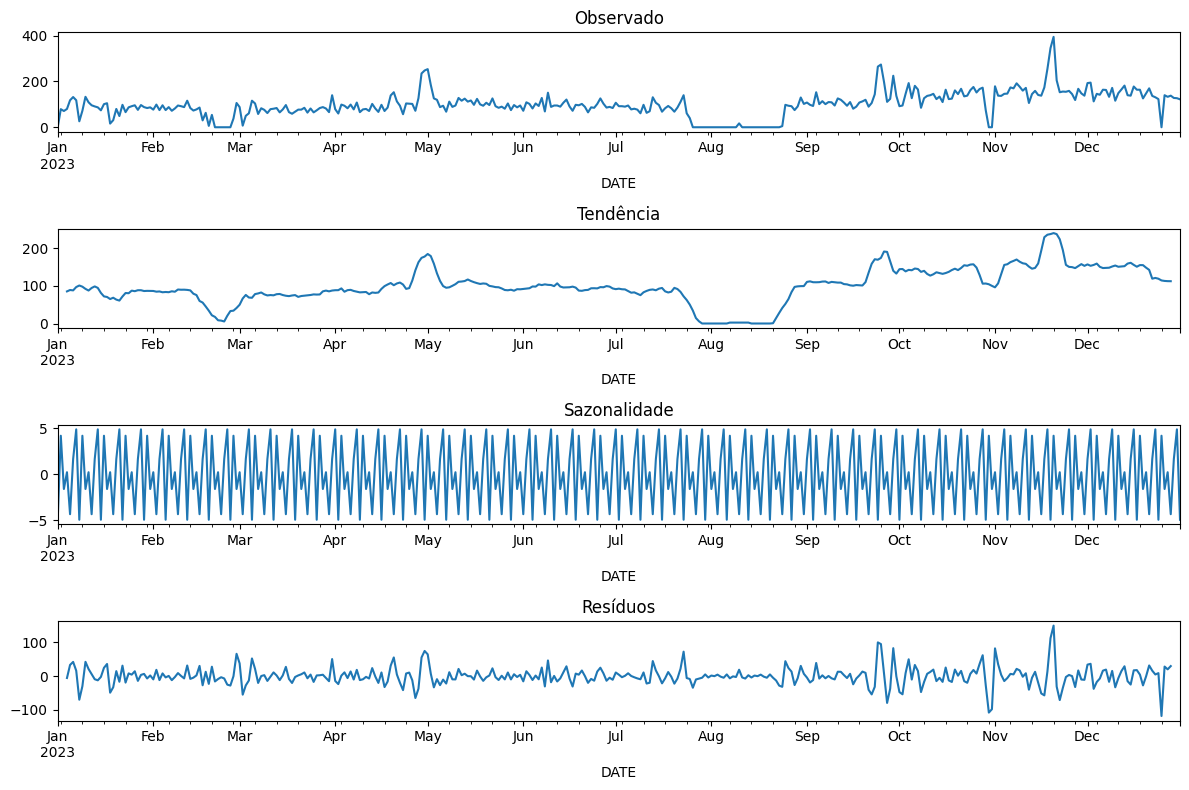

In [168]:
result = seasonal_decompose(sales_suco)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))

result.observed.plot(ax=ax1)
ax1.set_title('Observado')

result.trend.plot(ax=ax2)
ax2.set_title('Tendência')

result.seasonal.plot(ax=ax3)
ax3.set_title('Sazonalidade')

result.resid.plot(ax=ax4)
ax4.set_title('Resíduos')

plt.tight_layout()

In [169]:
print(f'Quantidade de dados nulos: {sales_suco.isna().sum().values[0]}')

Quantidade de dados nulos: 0


In [170]:
sales_suco.value_counts().sort_values(ascending=False)

COUNT
0        38
95        8
92        7
98        7
88        6
         ..
255       1
265       1
274       1
346       1
395       1
Name: count, Length: 142, dtype: int64

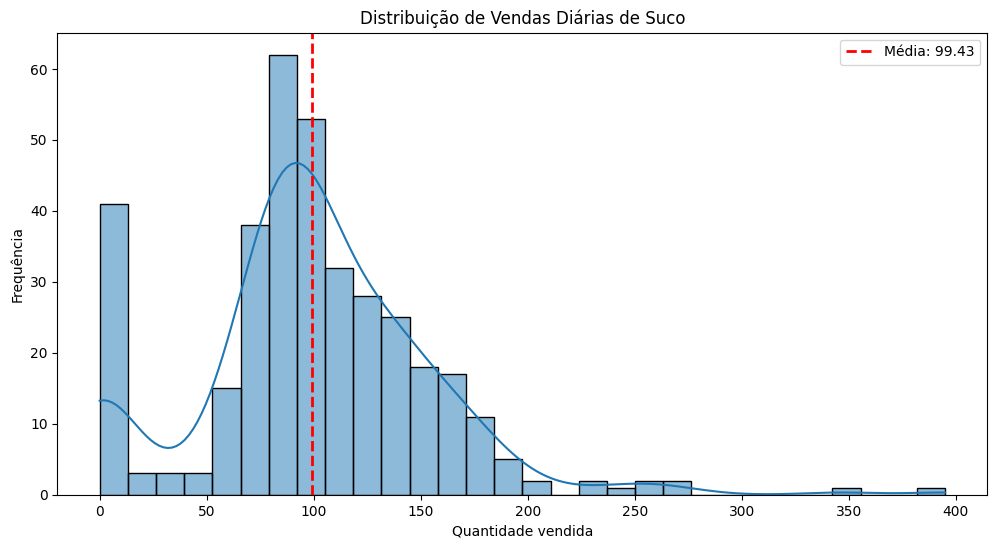

In [98]:
plt.figure(figsize=(12, 6))
sns.histplot(sales_suco['COUNT'], bins=30, edgecolor='k', kde=True)
plt.title('Distribuição de Vendas Diárias de Suco')
plt.xlabel('Quantidade vendida')
plt.ylabel('Frequência')

media_vendas = sales_suco['COUNT'].mean()
plt.axvline(media_vendas, linestyle='--', color='red', label=f'Média: {media_vendas:.2f}', linewidth=2)

plt.legend()
plt.show()

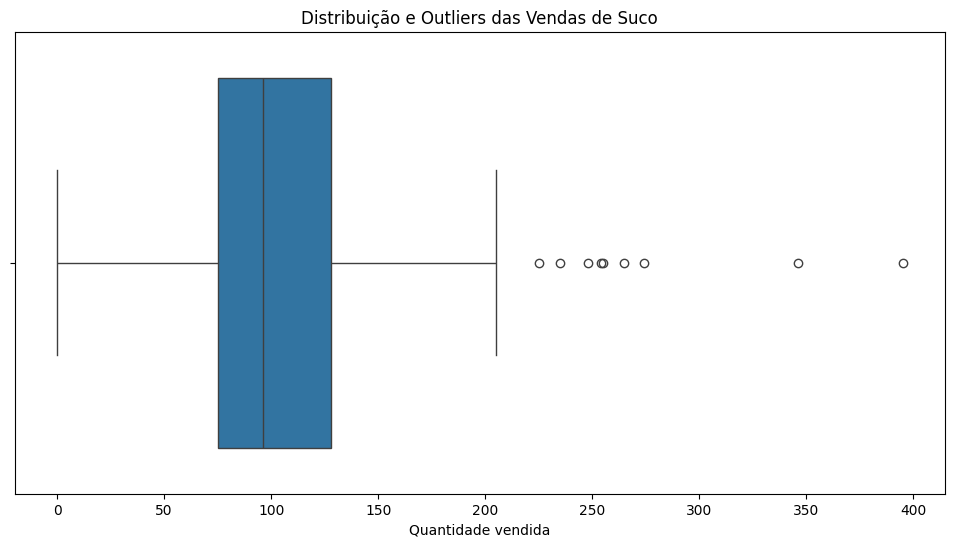

In [171]:
plt.figure(figsize=(12, 6))

sns.boxplot(x=sales_suco['COUNT'])
plt.title('Distribuição e Outliers das Vendas de Suco')
plt.xlabel('Quantidade vendida')
plt.show()

In [174]:
q1 = sales_suco['COUNT'].quantile(0.25)
q3 = sales_suco['COUNT'].quantile(0.75)
iqr = q3 - q1

sales_suco = sales_suco[(sales_suco['COUNT'] > q1 - iqr * 1.5) & (sales_suco['COUNT'] < q3 + iqr * 1.5)]

In [175]:
sales_suco.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 356 entries, 2023-01-01 to 2023-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   COUNT   356 non-null    int64
dtypes: int64(1)
memory usage: 5.6 KB


In [176]:
sales_suco.to_csv("../data/sales_suco_cleaned.csv")